In [0]:
import pandas as pd

In [0]:
df=pd.read_csv("train.csv", index_col=False)

In [0]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


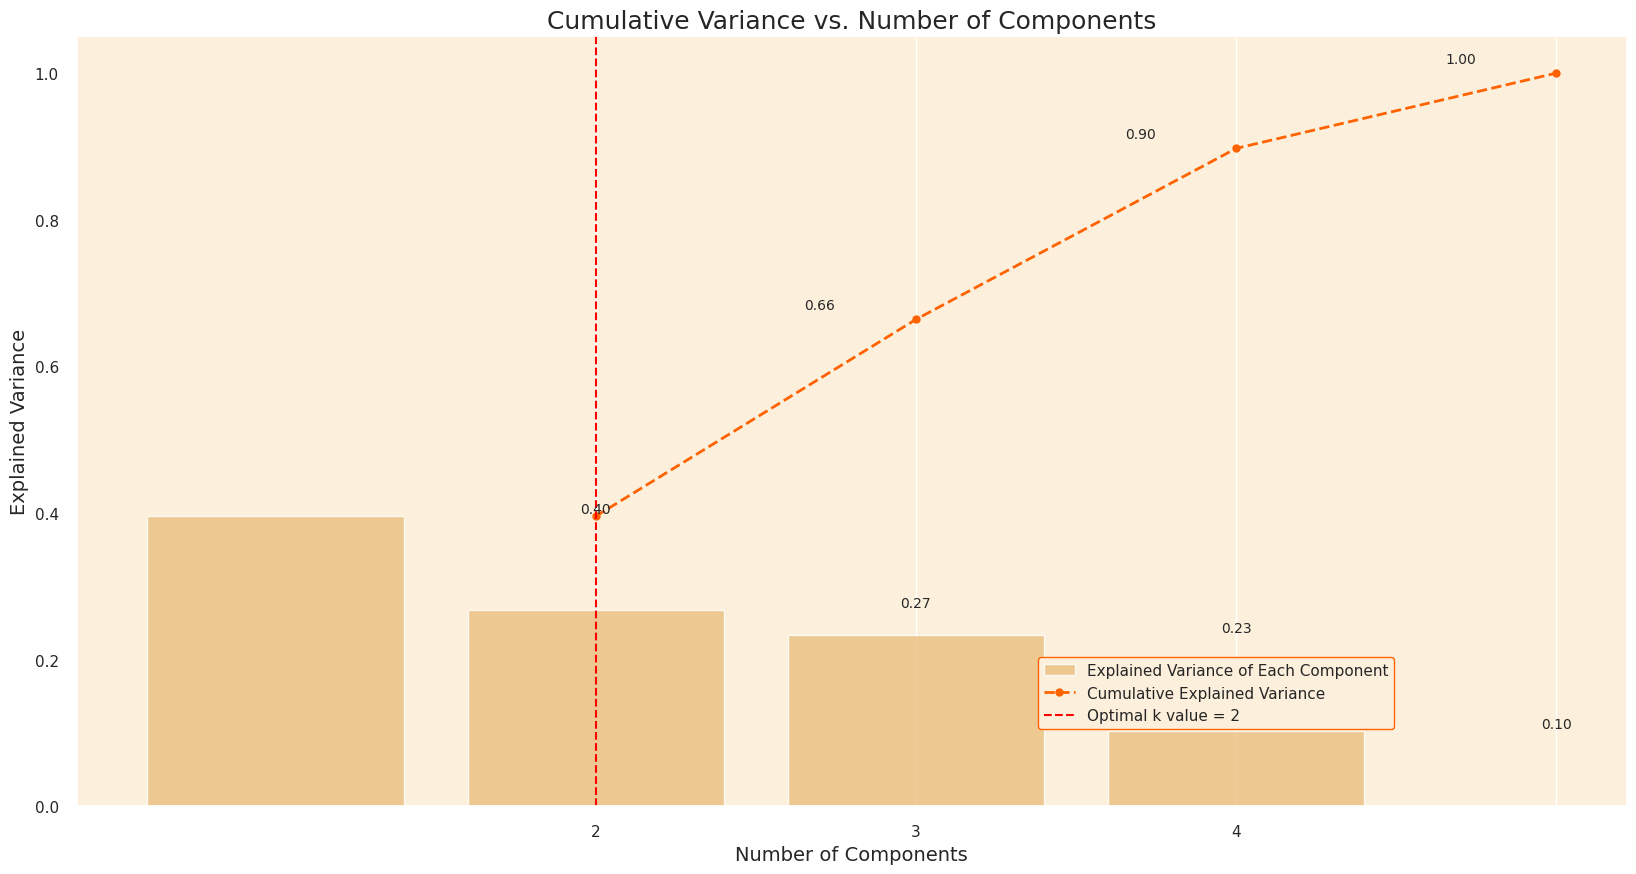

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming the dataset is loaded into a DataFrame `df`
# Relevant columns for PCA: 'Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'
features = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']

# Handle missing data by filling NaN with 0 (if applicable)
data_filled = df[features].fillna(0)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

# Convert the scaled data back to a DataFrame for further analysis
data_scaled_df = pd.DataFrame(data_scaled, columns=features)

# Apply PCA
pca = PCA().fit(data_scaled_df)

# Calculate the cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Set the optimal number of components based on analysis
optimal_k = 2  # Adjust based on explained variance threshold or elbow method

# Set seaborn plot style
sns.set(rc={'axes.facecolor': '#fcf0dc'}, style='darkgrid')

# Plot the cumulative explained variance against the number of components
plt.figure(figsize=(20, 10))

# Bar chart for the explained variance of each component
barplot = sns.barplot(
    x=list(range(1, len(cumulative_explained_variance) + 1)),
    y=explained_variance_ratio,
    color='#fcc36d',
    alpha=0.8
)

# Line plot for the cumulative explained variance
lineplot, = plt.plot(
    range(1, len(cumulative_explained_variance) + 1), 
    cumulative_explained_variance,
    marker='o', linestyle='--', color='#ff6200', linewidth=2
)

# Plot optimal k value line
optimal_k_line = plt.axvline(optimal_k - 1, color='red', linestyle='--', label=f'Optimal k value = {optimal_k}')

# Set labels and title
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Explained Variance', fontsize=14)
plt.title('Cumulative Variance vs. Number of Components', fontsize=18)

# Customize ticks and legend
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.legend(
    handles=[barplot.patches[0], lineplot, optimal_k_line],
    labels=[
        'Explained Variance of Each Component', 
        'Cumulative Explained Variance', 
        f'Optimal k value = {optimal_k}'
    ],
    loc=(0.62, 0.1),
    frameon=True,
    framealpha=1.0,  
    edgecolor='#ff6200'
)

# Display the variance values for both graphs on the plots
x_offset = -0.3
y_offset = 0.01
for i, (ev_ratio, cum_ev_ratio) in enumerate(zip(explained_variance_ratio, cumulative_explained_variance)):
    plt.text(i + 1, ev_ratio, f"{ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)
    if i > 0:
        plt.text(i + 1 + x_offset, cum_ev_ratio + y_offset, f"{cum_ev_ratio:.2f}", ha="center", va="bottom", fontsize=10)

plt.grid(axis='both')
plt.show()


In [0]:
from sklearn.decomposition import PCA
import pandas as pd

# Step 1: Initialize a PCA object with the desired number of components
pca = PCA(n_components=4)

# Step 2: Fit and transform the scaled data to the new PCA space
transaction_data_pca = pca.fit_transform(data_scaled_df)

# Step 3: Create a new DataFrame from the PCA-transformed data
# Label the columns as PC1, PC2, ..., PC7
transaction_data_pca = pd.DataFrame(
    transaction_data_pca, 
    columns=['PC' + str(i + 1) for i in range(pca.n_components_)]
)

# Step 4: Restore the original index (e.g., `invoice_no`) to the new PCA DataFrame
transaction_data_pca.index = data_scaled_df.index




In [0]:
transaction_data_pca.head()

,PC1,PC2,PC3,PC4
0,2.003097,-0.311246,-0.466783,-0.736240
1,-1.593045,-0.271739,-1.415711,0.064904
2,0.102941,-1.424918,0.068547,-0.081867
3,0.031061,-1.811850,0.213680,-1.112274
4,-1.252369,-0.843206,-1.351873,0.221011


In [0]:

!pip install yellowbrick

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f36134a1f30>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

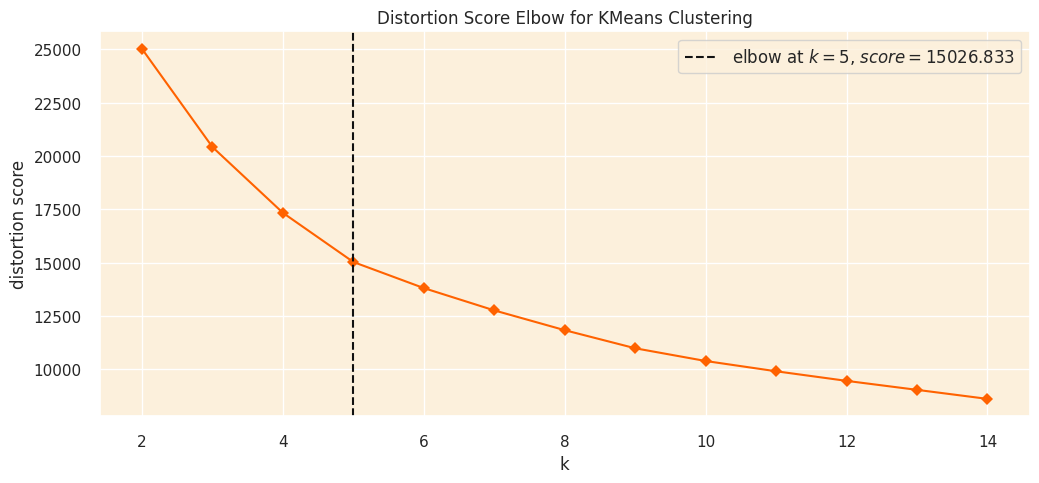

In [0]:
# Set plot style, and background color
sns.set(style='darkgrid', rc={'axes.facecolor': '#fcf0dc'})

# Set the color palette for the plot
sns.set_palette(['#ff6200'])

# Instantiate the clustering model with the specified parameters
km = KMeans(init='k-means++', n_init=10, max_iter=100, random_state=0)

# Create a figure and axis with the desired size
fig, ax = plt.subplots(figsize=(12, 5))

# Instantiate the KElbowVisualizer with the model and range of k values, and disable the timing plot
visualizer = KElbowVisualizer(km, k=(2, 15), timings=False, ax=ax)

# Fit the data to the visualizer
visualizer.fit(transaction_data_pca)

# Finalize and render the figure
visualizer.show();

In [0]:

import matplotlib.gridspec as gridspec

In [0]:
def silhouette_analysis(df, start_k, stop_k, figsize=(15, 16)):
    """
    Perform Silhouette analysis for a range of k values and visualize the results.
    """

    # Set the size of the figure
    plt.figure(figsize=figsize)

    # Create a grid with (stop_k - start_k + 1) rows and 2 columns
    grid = gridspec.GridSpec(stop_k - start_k + 1, 2)

    # Assign the first plot to the first row and both columns
    first_plot = plt.subplot(grid[0, :])

    # First plot: Silhouette scores for different k values
    sns.set_palette(['darkorange'])

    silhouette_scores = []

    # Iterate through the range of k values
    for k in range(start_k, stop_k + 1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100, random_state=0)
        km.fit(df)
        labels = km.predict(df)
        score = silhouette_score(df, labels)
        silhouette_scores.append(score)

    best_k = start_k + silhouette_scores.index(max(silhouette_scores))

    plt.plot(range(start_k, stop_k + 1), silhouette_scores, marker='o')
    plt.xticks(range(start_k, stop_k + 1))
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette score')
    plt.title('Average Silhouette Score for Different k Values', fontsize=15)

    # Add the optimal k value text to the plot
    optimal_k_text = f'The k value with the highest Silhouette score is: {best_k}'
    plt.text(10, 0.23, optimal_k_text, fontsize=12, verticalalignment='bottom', 
             horizontalalignment='left', bbox=dict(facecolor='#fcc36d', edgecolor='#ff6200', boxstyle='round, pad=0.5'))
             

    # Second plot (subplot): Silhouette plots for each k value
    colors = sns.color_palette("bright")

    for i in range(start_k, stop_k + 1):    
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=0)
        row_idx, col_idx = divmod(i - start_k, 2)

        # Assign the plots to the second, third, and fourth rows
        ax = plt.subplot(grid[row_idx + 1, col_idx])

        visualizer = SilhouetteVisualizer(km, colors=colors, ax=ax)
        visualizer.fit(df)

        # Add the Silhouette score text to the plot
        score = silhouette_score(df, km.labels_)
        ax.text(0.97, 0.02, f'Silhouette Score: {score:.2f}', fontsize=12, \
                ha='right', transform=ax.transAxes, color='red')

        ax.set_title(f'Silhouette Plot for {i} Clusters', fontsize=15)

    plt.tight_layout()
    plt.show()

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f361335c310>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

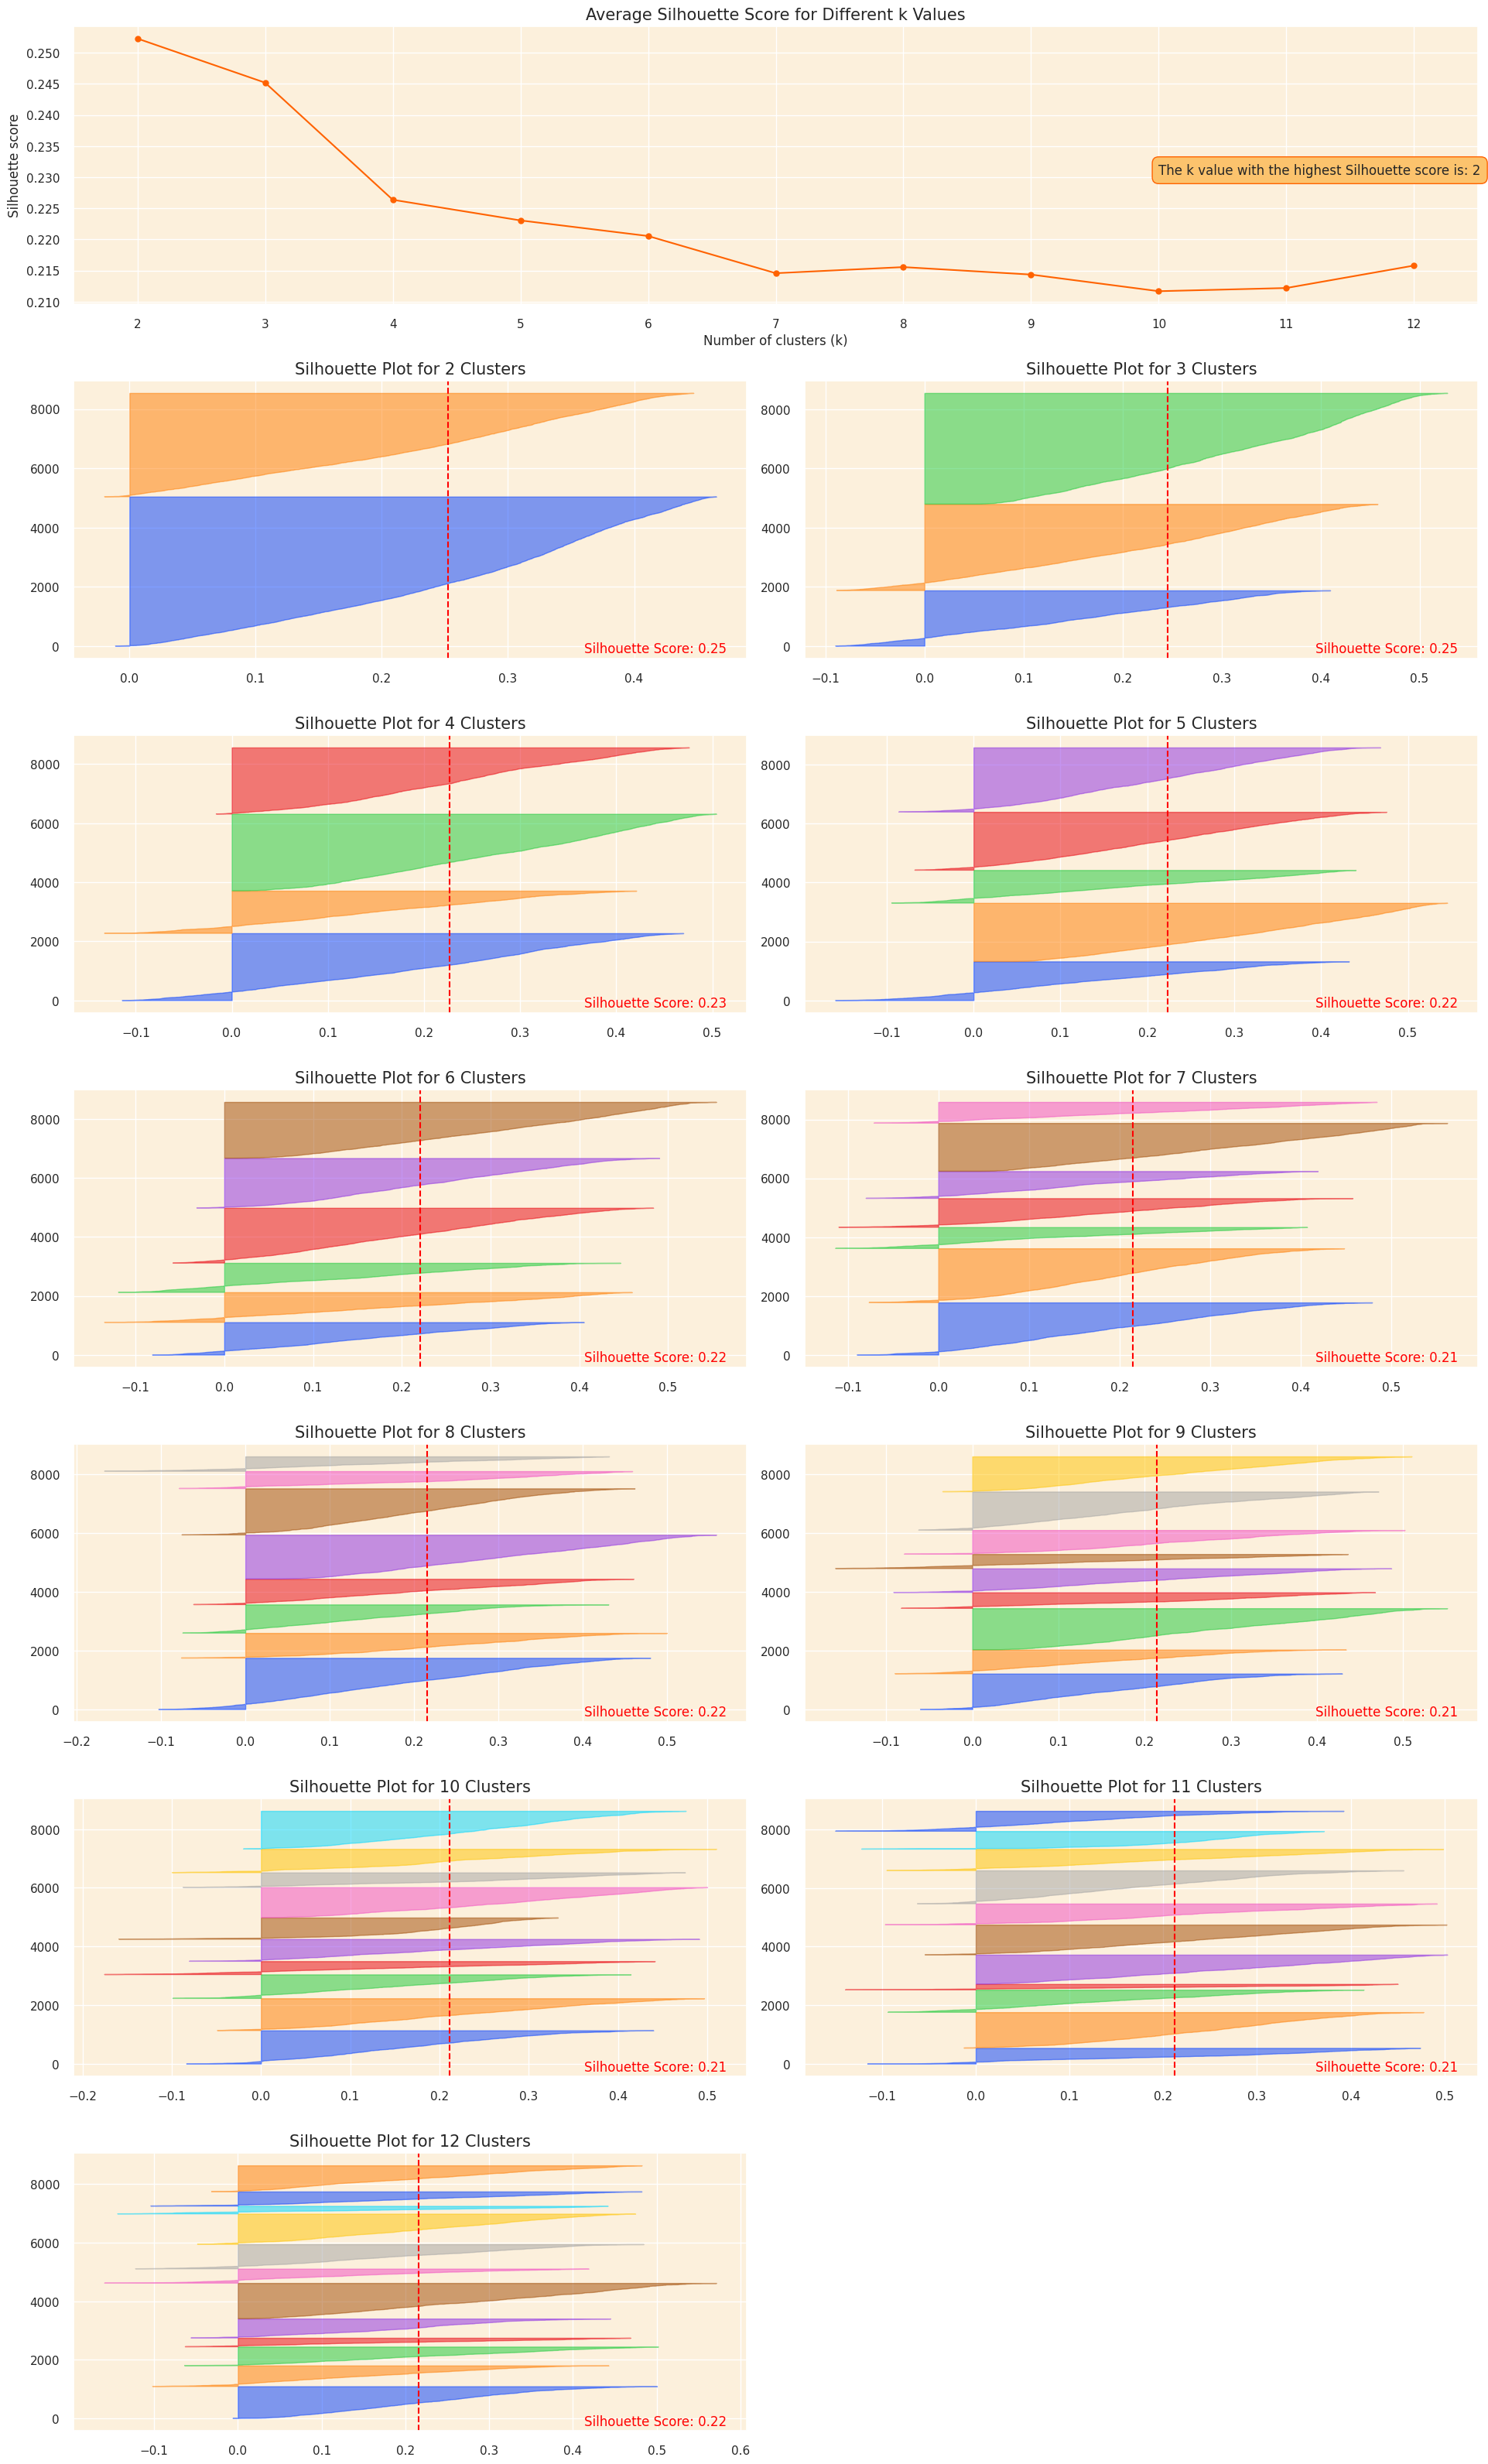

In [0]:

silhouette_analysis(transaction_data_pca, 2, 12, figsize=(20, 50))

In [0]:
from sklearn.cluster import KMeans
from collections import Counter
import numpy as np

# Step 1: Apply KMeans clustering with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=100, random_state=0)
kmeans.fit(transaction_data_pca)

# Step 2: Get the frequency of each cluster
cluster_frequencies = Counter(kmeans.labels_)

# Step 3: Create a mapping from old labels to new labels based on frequency (optional)
label_mapping = {label: new_label for new_label, (label, _) in 
                 enumerate(cluster_frequencies.most_common())}

# Example of a custom label mapping based on your criteria (modify as needed for 5 clusters)
# Assuming a remapping that reflects your business or analytical requirements:
label_mapping = {0: 4, 1: 0, 2: 1, 3: 2, 4: 3}  # Example mapping for 5 clusters

# Step 4: Apply the mapping to get the new labels
new_labels = np.array([label_mapping[label] for label in kmeans.labels_])

# Step 5: Append the new cluster labels to the original dataset
df['cluster'] = new_labels

# Step 6: Append the new cluster labels to the PCA-transformed dataset
transaction_data_pca['cluster'] = new_labels


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7f361316e5f0>
Traceback (most recent call last):
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/databricks/python/lib/python3.10/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_ca

In [0]:
transaction_data_pca

,PC1,PC2,PC3,PC4,cluster
0,2.003097,-0.311246,-0.466783,-0.736240,1
1,-1.593045,-0.271739,-1.415711,0.064904,2
2,0.102941,-1.424918,0.068547,-0.081867,3
3,0.031061,-1.811850,0.213680,-1.112274,3
4,-1.252369,-0.843206,-1.351873,0.221011,0
...,...,...,...,...,...
8518,1.099457,0.425726,-0.277302,-0.655000,3
8519,-0.976357,-0.088730,-0.567453,-0.414724,2
8520,-0.934609,-0.512648,-0.594265,0.103386,0
8521,-0.787592,1.370102,0.569249,0.471923,4


In [0]:
import plotly.graph_objects as go

# Setting up the color scheme for 5 clusters
colors = ['#e8000b', '#1ac938', '#023eff', '#f97306', '#ffc400']  # Adjusted for 5 clusters

# Create separate data frames for each cluster
cluster_data = [transaction_data_pca[transaction_data_pca['cluster'] == i] for i in range(5)]  # Range updated to 5

# Create a 3D scatter plot
fig = go.Figure()

# Add data points for each cluster separately and specify the color
for i in range(5):  # Range updated to 5
    fig.add_trace(go.Scatter3d(
        x=cluster_data[i]['PC1'], y=cluster_data[i]['PC2'], z=cluster_data[i]['PC3'], 
        mode='markers', 
        marker=dict(color=colors[i], size=5, opacity=0.4), 
        name=f'Cluster {i}'
    ))

# Set the title and layout details
fig.update_layout(
    title=dict(text='3D Visualization of Transaction Clusters in PCA Space', x=0.5),
    scene=dict(
        xaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC1'),
        yaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC2'),
        zaxis=dict(backgroundcolor="#fcf0dc", gridcolor='white', title='PC3'),
    ),
    width=900,
    height=800
)

# Show the plot
fig.show()


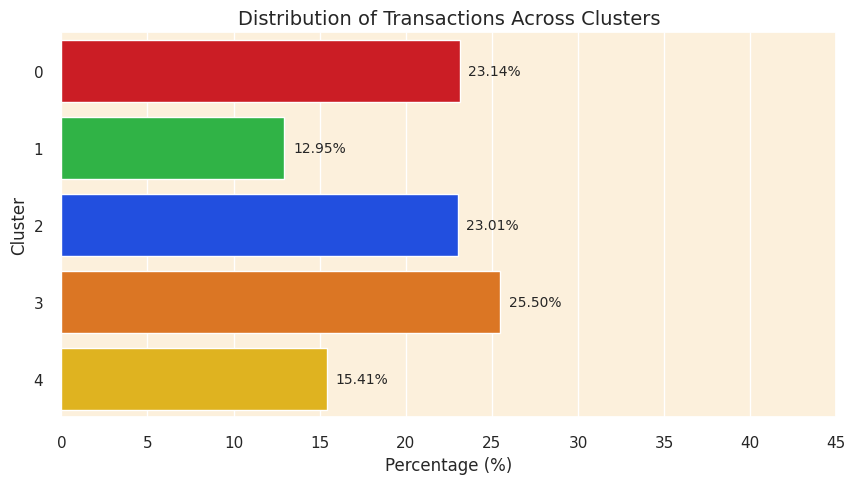

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Calculate the percentage of transactions in each cluster
cluster_percentage = (transaction_data_pca['cluster'].value_counts(normalize=True) * 100).reset_index()
cluster_percentage.columns = ['Cluster', 'Percentage']
cluster_percentage.sort_values(by='Cluster', inplace=True)

# Set the color scheme for 5 clusters
colors = ['#e8000b', '#1ac938', '#023eff', '#f97306', '#ffc400']  # 5 colors for 5 clusters

# Create a horizontal bar plot
plt.figure(figsize=(10, 5))
sns.barplot(x='Percentage', y='Cluster', data=cluster_percentage, orient='h', palette=colors)

# Adding percentages on the bars
for index, value in enumerate(cluster_percentage['Percentage']):
    plt.text(value + 0.5, index, f'{value:.2f}%', va='center', fontsize=10)

# Customize the plot
plt.title('Distribution of Transactions Across Clusters', fontsize=14)
plt.xticks(ticks=np.arange(0, 50, 5))  # Adjust range based on data
plt.xlabel('Percentage (%)')
plt.ylabel('Cluster')

# Show the plot
plt.show()


In [0]:

import pickle

# Save the model
with open('kmeans_model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

In [0]:

!pip install tabulate
from tabulate import tabulate

Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.
Note: you may need to restart the kernel using dbutils.library.restartPython() to use updated packages.


In [0]:

# Compute number of transactions
num_observations = len(transaction_data_pca)

# Separate the features and the cluster labels
X = transaction_data_pca.drop('cluster', axis=1)
clusters = transaction_data_pca['cluster']

# Compute the metrics
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Create a table to display the metrics and the number of observations
table_data = [
    ["Number of Observations", num_observations],
    ["Silhouette Score", sil_score],
    ["Calinski Harabasz Score", calinski_score],
    ["Davies Bouldin Score", davies_score]
]

# Print the table
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+-------------------------+--------------------+
|         Metric          |       Value        |
+-------------------------+--------------------+
| Number of Observations  |        8523        |
|    Silhouette Score     | 0.2230564264723495 |
| Calinski Harabasz Score |  2701.78514318349  |
|  Davies Bouldin Score   | 1.2666265345277412 |
+-------------------------+--------------------+


In [0]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,cluster
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,2
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,3
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,3
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,3
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850,2
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,0
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,4


In [0]:

df.to_csv('clustered_transactions.csv',index=False)

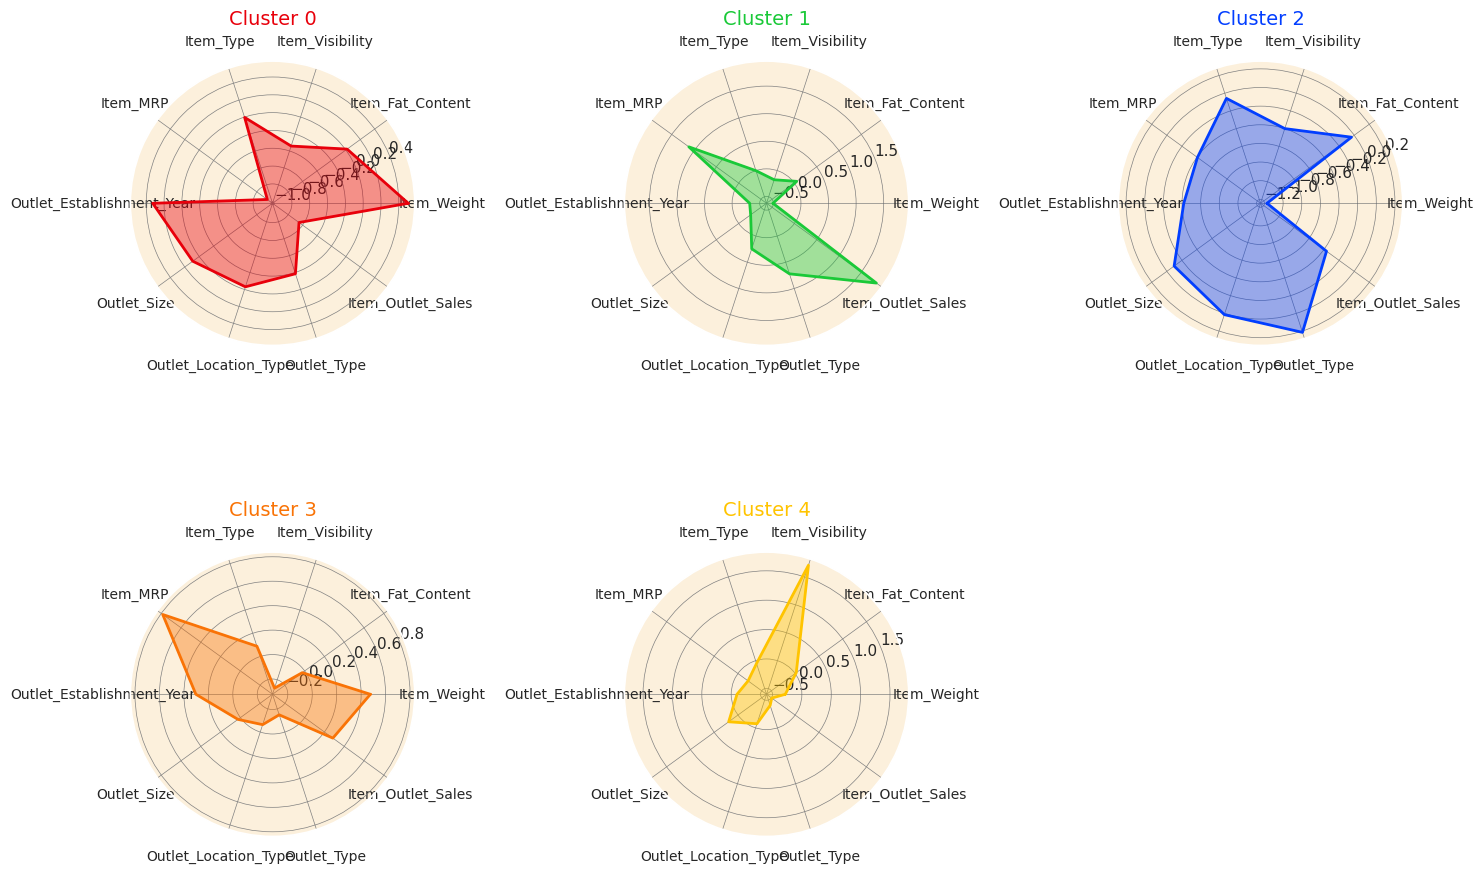

In [0]:


# Drop unnecessary columns
df_processed = df.drop(columns=['Item_Identifier', 'Outlet_Identifier', 'cluster'])

# Identify categorical columns (to encode)
categorical_cols = df_processed.select_dtypes(include=['object']).columns

# Encode categorical columns using LabelEncoder
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    label_encoders[col] = le  # Save the encoder for possible inverse transformation later

# Standardize numeric columns
scaler = StandardScaler()
numeric_cols = df_processed.select_dtypes(include=['int64', 'float64']).columns
df_standardized = scaler.fit_transform(df_processed[numeric_cols])

# Create a new dataframe with standardized values and add the cluster column back
df_transaction_standardized = pd.DataFrame(df_standardized, columns=numeric_cols, index=df.index)
df_transaction_standardized['cluster'] = df['cluster']

# Calculate the centroids of each cluster
cluster_centroids = df_transaction_standardized.groupby('cluster').mean()

# Function to create a radar chart
def create_radar_chart(ax, angles, data, color, cluster):
    # Plot the data and fill the area
    ax.fill(angles, data, alpha=0.4, color=color)
    ax.plot(angles, data, color=color, linewidth=2, linestyle='solid')
    
    # Add a title
    ax.set_title(f'Cluster {cluster}', size=14, color=color, y=1.1)

# Set data
labels = np.array(cluster_centroids.columns)
num_vars = len(labels)

# Compute angle of each axis
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "complete the loop" and append the start to the end
labels = np.concatenate((labels, [labels[0]]))
angles += angles[:1]

# Define the color scheme for 5 clusters
colors = ['#e8000b', '#1ac938', '#023eff', '#f97306', '#ffc400']  # 5 colors for 5 clusters

# Initialize the figure with 2 rows and 3 columns (5 clusters; extra subplots remain empty)
fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(polar=True), nrows=2, ncols=3)

# Flatten the ax array to easily index into it
ax = ax.flatten()

# Create radar chart for each cluster
for i, color in enumerate(colors):
    data = cluster_centroids.loc[i].tolist()
    data += data[:1]  # Complete the loop
    create_radar_chart(ax[i], angles, data, color, i)

# Add labels and grid for each subplot
for i in range(5):  # For 5 clusters
    ax[i].set_xticks(angles[:-1])
    ax[i].set_xticklabels(labels[:-1], fontsize=10)

# Disable unused subplots (if any)
for j in range(5, len(ax)):
    fig.delaxes(ax[j])

# Add a grid
for i in range(5):  # For 5 clusters
    ax[i].grid(color='grey', linewidth=0.5)

# Display the plot
plt.tight_layout()
plt.show()
